### Brazilian E-commerce Dataset by Olist
This is a Brazilian ecommerce public dataset of orders made at Olist. The dataset has information of 100k orders from 2016 to 2018 made in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers. It also has a geolocation dataset that relates Brazilian zip codes to lat/lng coordinates.

The objective of this notebook is to propose an analytical view of e-commerce relationship in Brazil. For this we will first go through an exploratory data analysis using graphical tools to create self explanatory plots for better understanding what is behind braziian online purchasing. 

In [81]:
# Standard libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
from scipy.stats import skew,kurtosis

In [42]:
# Reading all the files
raw_path = './Dataset/brazilian-ecommerce/'
olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
olist_product_translation = pd.read_csv(raw_path + 'product_category_name_translation.csv')

In [43]:
olist_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [44]:
datasets = [olist_customer, olist_geolocation, olist_orders, olist_order_items, olist_order_payments, 
            olist_order_reviews, olist_products, olist_sellers]
names = ['olist_customer', 'olist_geolocation', 'olist_orders', 'olist_order_items', 'olist_order_payments', 
            'olist_order_reviews', 'olist_products', 'olist_sellers']

In [45]:
# Creating a DataFrame with useful information about all datasets
df_info = pd.DataFrame({})
df_info['dataset'] = names
df_info['n_rows'] = [df.shape[0] for df in datasets]
df_info['n_cols'] = [df.shape[1] for df in datasets]
df_info['null_amount'] = [df.isnull().sum().sum() for df in datasets]
df_info['null_columns_qty'] = [len([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]
df_info['null_columns_names'] = [', '.join([col for col, null in df.isnull().sum().items() if null > 0]) for df in datasets]

df_info.style.background_gradient()

,dataset,n_rows,n_cols,null_amount,null_columns_qty,null_columns_names
0,olist_customer,99441,5,0,0,
1,olist_geolocation,1000163,5,0,0,
2,olist_orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_date, order_delivered_customer_date"
3,olist_order_items,112650,7,0,0,
4,olist_order_payments,103886,5,0,0,
5,olist_order_reviews,100000,7,146532,2,"review_comment_title, review_comment_message"
6,olist_products,32951,9,2448,8,"product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm"
7,olist_sellers,3095,4,0,0,


### HANDLING MISSING VALUES

In [46]:
olist_orders = olist_orders.drop(columns=['order_approved_at' , 'order_delivered_customer_date', 'order_delivered_carrier_date'])
olist_products = olist_products.drop(columns=["product_weight_g","product_name_lenght", "product_description_lenght", "product_photos_qty", "product_height_cm", "product_width_cm", "product_length_cm"])
olist_order_reviews = olist_order_reviews.drop(columns=['review_comment_title', 'review_comment_message'])

## Exploratory Data Analysis
#### We will go through an exploratory data analysis to get insights from E-Commerce in Brazil. The aim here is to divide this dataset into topics so we can explore visualisation for each dataset (orders, customers, products, items, and others)

#### ORDER SUMMARY: 

In [47]:
print("Total number of orders in the database:",olist_orders['order_id'].nunique())
print("Total Number of customers:",olist_orders['customer_id'].nunique())

Total number of orders in the database: 99441
Total Number of customers: 99441


In [48]:
olist_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

###### Let's check the order status - A majority of the orders in the database are delivered products , while some are in transit 

#### ORDER VALUE: 

In [49]:
print("Maximum amount of order is BRL:", olist_order_payments['payment_value'].max())
print("Minimum amount of order is BRL:", olist_order_payments['payment_value'].min())
print("Average order value is BRL:", olist_order_payments['payment_value'].mean())
print("Median order value is BRL:", olist_order_payments['payment_value'].median())

Maximum amount of order is BRL: 13664.08
Minimum amount of order is BRL: 0.0
Average order value is BRL: 154.10038041698365
Median order value is BRL: 100.0


In [50]:
olist_order_items.head(10)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40


### The top 5 orders and their value is shown below :-
#### We summarise the order with the help of order id and have a look at the order value and freight value.

In [51]:
value = olist_order_items.groupby('order_id')['price','freight_value'].sum().sort_values(by='price',ascending=False).reset_index()

In [52]:
value.head(5)

,order_id,price,freight_value
0,03caa2c082116e1d31e67e9ae3700499,13440.0,224.08
1,736e1922ae60d0d6a89247b851902527,7160.0,114.88
2,0812eb902a67711a1cb742b3cdaa65ae,6735.0,194.31
3,fefacc66af859508bf1a7934eab1e97f,6729.0,193.21
4,f5136e38d1a14a4dbd87dff67da82701,6499.0,227.66


In [53]:
value.tail(5)

,order_id,price,freight_value
98661,38bcb524e1c38c2c1b60600a80fc8999,2.90,8.72
98662,e8bbc1d69fee39eee4c72cb5c969e39d,2.29,7.78
98663,f1d5c2e6867fa93ceee9ef9b34a53cbf,2.20,7.39
98664,3ee6513ae7ea23bdfab5b9ab60bffcb5,0.85,18.23
98665,6e864b3f0ec71031117ad4cf46b7f2a1,0.85,18.23


#### Lets plot a histogram of the product value and freight value to understand the skewness of the data.

Text(0, 0.5, 'Frequency')

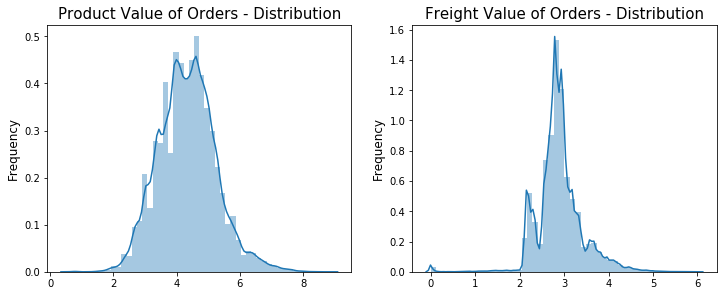

In [54]:
plt.figure(figsize=(12,10))

plt.subplot(221)
g = sns.distplot(np.log(olist_order_items['price'] + 1))
g.set_title("Product Value of Orders - Distribution", fontsize=15)
g.set_xlabel("")
g.set_ylabel("Frequency", fontsize=12)

plt.subplot(222)
g1 = sns.distplot(np.log(olist_order_items['freight_value'] + 1))
g1.set_title("Freight Value of Orders - Distribution", fontsize=15)
g1.set_xlabel("")
g1.set_ylabel("Frequency", fontsize=12)

Both the distributions seems to follow a normal curve.Lets check the skewness and kurtosis.

In [55]:
print("Skewness of the transaction value:",skew(np.log(olist_order_items['price']+1)))
print("Excess Kurtosis of the transaction value:",kurtosis(np.log(olist_order_items['price']+1)))

Skewness of the transaction value: 0.29352507587395965
Excess Kurtosis of the transaction value: 0.44552502721084064


Skewness of the data suggests that the data is fairly symmetrical and positive whereas kurtosis value is < 3.

### 1. Total Orders on E-Commerce

#### Let's dive into the orders dataset to see how the trend can be presented in Brazil.

Looking at the order dataset columns, we can see orders with different status and with different timestamp columns like purchase, approved, delivered and estimated delivery. First, let's look at the status of the orders we have in this dataset.

### How many orders we have for each status?

In [56]:
olist_orders.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-08-23 00:00:00


In [57]:
olist_orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [58]:
df = olist_orders.groupby(["order_status"]).size().reset_index(name='status_qt')

fig = px.bar(df,
             y='status_qt',
             x="order_status", color='order_status',
             labels={'status_qt':'Total Count of Status'}, height=600)
fig.show()

By the time this dataset was created, the highest amount of orders went from delivered ones.

### Evaluation of e-commerce scenario/trend in Brazil

#### Let's dive into the real evolution of e-commerce in terms of purchase orders. For this, we have to extract some info on the order_purchase_timestamp. We have to do the following:

1. Transform timestamp columns;
2. Extract time attributes from these datetime columns (year, month, day, day of week and hour);
3. Evaluate the e-commerce scenario using this attributes.

In [59]:
# Changing the data type for date columns
olist_orders['order_purchase_timestamp']=pd.to_datetime(olist_orders['order_purchase_timestamp'])
olist_orders['order_estimated_delivery_date']=pd.to_datetime(olist_orders['order_estimated_delivery_date'])

In [60]:
# Extracting attributes for purchase date - Year and Month
olist_orders['order_purchase_year'] = olist_orders['order_purchase_timestamp'].apply(lambda x: x.year)
olist_orders['order_purchase_month'] = olist_orders['order_purchase_timestamp'].apply(lambda x: x.month)
olist_orders['order_purchase_month_name'] = olist_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
olist_orders['order_purchase_year_month'] = olist_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
olist_orders['order_purchase_date'] = olist_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

In [61]:
# Extracting attributes for purchase date - Day and Day of Week
olist_orders['order_purchase_day'] = olist_orders['order_purchase_timestamp'].apply(lambda x: x.day)
olist_orders['order_purchase_dayofweek'] = olist_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
olist_orders['order_purchase_dayofweek_name'] = olist_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

In [62]:
# Extracting attributes for purchase date - Hour and Time of the Day
olist_orders['order_purchase_hour'] = olist_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
olist_orders['order_purchase_time_day'] = pd.cut(olist_orders['order_purchase_hour'], hours_bins, labels = hours_labels)

In [63]:
# New DataFrame after transformations
olist_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-18,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-13,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-09-04,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-15,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-26,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


In [64]:
#defining visualizaition functions
def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    

def single_countplot(df, ax, x=None, y=None, order=True, hue=False, palette='plasma', width=0.75, sub_width=0.3,
                     sub_size=12):
    """
    Parâmetros
    ----------
    classifiers: conjunto de classificadores em forma de dicionário [dict]
    X: array com os dados a serem utilizados no treinamento [np.array]
    y: array com o vetor target do modelo [np.array]

    Retorno
    -------
    None
    """

    # Verificando plotagem por quebra de alguma variável categórica
    ncount = len(df)
    if x:
        col = x
    else:
        col = y
    if hue != False:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index, hue=hue)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, hue=hue)
    else:
        if order:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax, order=df[col].value_counts().index)
        else:
            sns.countplot(x=x, y=y, data=df, palette=palette, ax=ax)

##### Let's plot three graphs using a GridSpec that will answer the following questions:

1. Is there any growing trend on brazilian e-commerce?
2. On what day of week brazilians customers tend to do online purchasing?
3. What time brazilians customers tend do buy (Dawn, Morning, Afternoon or Night)?

/Users/archita/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



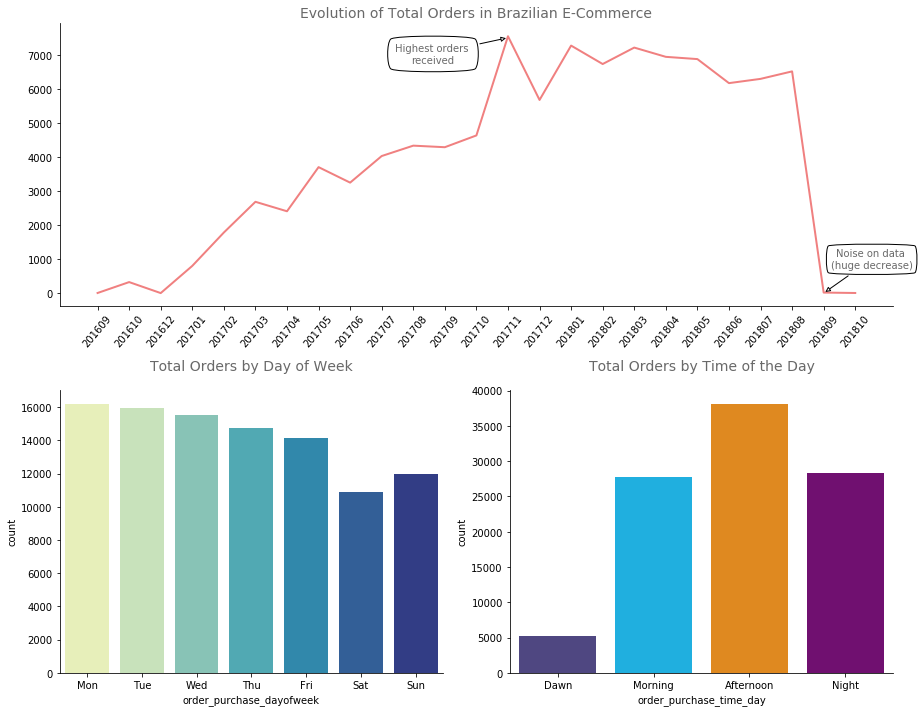

In [65]:

fig = plt.figure(constrained_layout=True, figsize=(13, 10))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])

# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(data=olist_orders['order_purchase_year_month'].value_counts().sort_index(), ax=ax1, 
             color='lightcoral', linewidth=2)

ax1.annotate(f'Highest orders \nreceived', (13, 7500), xytext=(-75, -25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.8),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')
ax1.annotate(f'Noise on data \n(huge decrease)', (23, 0), xytext=(48, 25), 
             textcoords='offset points', bbox=dict(boxstyle="round4", fc="w", pad=.5),
             arrowprops=dict(arrowstyle='-|>', fc='w'), color='dimgrey', ha='center')

#format_spines(ax1, right_border=False)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
for tick in ax1.get_xticklabels():
    tick.set_rotation(50)
ax1.set_title('Evolution of Total Orders in Brazilian E-Commerce', size=14, color='dimgrey')


# Barchart - Total of orders by day of week
single_countplot(olist_orders, x='order_purchase_dayofweek', ax=ax2, order=False, palette='YlGnBu')
weekday_label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
ax2.set_xticklabels(weekday_label)
ax2.set_title('Total Orders by Day of Week', size=14, color='dimgrey', pad=20)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# Barchart - Total of orders by time of the day
day_color_list = ['darkslateblue', 'deepskyblue', 'darkorange', 'purple']
single_countplot(olist_orders, x='order_purchase_time_day', ax=ax3, order=False, palette=day_color_list)
ax3.set_title('Total Orders by Time of the Day', size=14, color='dimgrey', pad=20)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

Looking at the charts above we can conclude: E-commerce on Brazil really has a growing trend along the time.

1. We can see some seasonality patterns with peak at Nov 24 due to Black Friday and Sales are weak after Dec(end-year holidays), but in general customers are buying more than before.
2. Monday's are most the prefered day for customers and they tend to buy more at afternoons.
3. As we can see a sharp decrease between August 2018 and September 2018, that maybe because of noise in data. 

#### Let's see the frequency of orders during the hour over the day:

In [66]:
day_hour=olist_orders.groupby(['order_purchase_dayofweek_name','order_purchase_hour']).agg({'order_id':'count'}).rename(columns={'order_id':'freq'}).reset_index()

In [67]:
### Sorting it so that the plot order is correct.
day_hour['order_purchase_dayofweek_name']=pd.Categorical(day_hour['order_purchase_dayofweek_name'],categories=['Sun','Mon','Tue','Wed','Thu','Fri','Sat'],ordered=True)

In [68]:
day_hour.head()

,order_purchase_dayofweek_name,order_purchase_hour,freq
0,Fri,0,426
1,Fri,1,216
2,Fri,2,72
3,Fri,3,49
4,Fri,4,40


In [69]:
day_hour=day_hour.pivot('order_purchase_dayofweek_name','order_purchase_hour','freq')

Text(0.5, 1.0, 'Heatmap of tranactions over the hour by day')

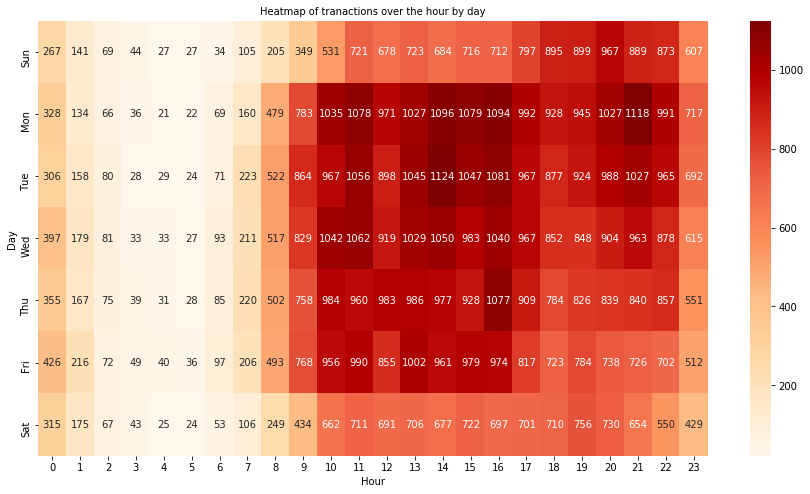

In [70]:
plt.figure(figsize=(15,8))
ax=sns.heatmap(day_hour,annot=True,fmt="d",cmap="OrRd")
ax.set_xlabel("Hour")
ax.set_ylabel("Day")
ax.set_title("Heatmap of tranactions over the hour by day",size=10)

Looking at the heatmap above, we can conclude few insights:

1. As the day progresses,the number of orders placed increases .
2. There is clearly a difference in the order frequency between weekdays and weekends .
3. While during weekdays , the order frequency increases steadly after 9 AM , the order frequency picks up only after 15:00 hrs during sundays

##### Now Let's compare 2017 and 2018 Year, we will just consider orders between January and August in both years to see the sharp decline in orders

Text(0, 0.5, 'Count')

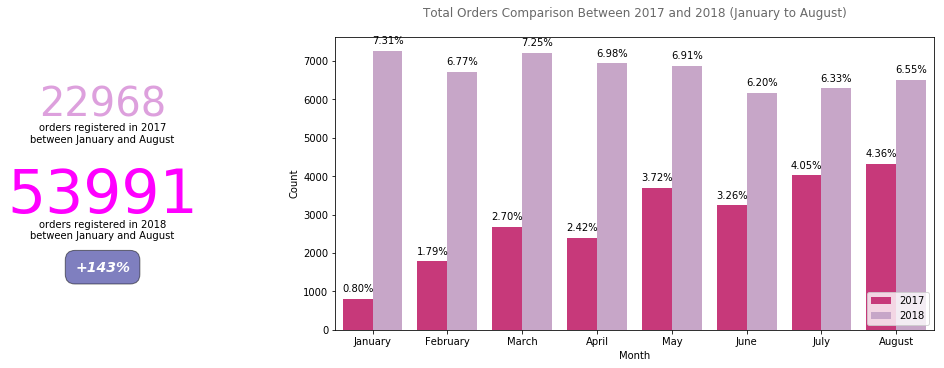

In [71]:
# Creating figure
fig = plt.figure(constrained_layout=True, figsize=(13, 5))

# Axis definition
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])

# Annotation - Grown on e-commerce orders between 2017 and 2018
olist_orders_compare = olist_orders.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
year_orders = olist_orders_compare['order_purchase_year'].value_counts()
growth = int(round(100 * (1 + year_orders[2017] / year_orders[2018]), 0))
ax1.text(0.00, 0.73, f'{year_orders[2017]}', fontsize=40, color='plum', ha='center')
ax1.text(0.00, 0.64, 'orders registered in 2017\nbetween January and August', fontsize=10, ha='center')
ax1.text(0.00, 0.40, f'{year_orders[2018]}', fontsize=60, color='magenta', ha='center')
ax1.text(0.00, 0.31, 'orders registered in 2018\nbetween January and August', fontsize=10, ha='center')
signal = '+' if growth > 0 else '-'
ax1.text(0.00, 0.20, f'{signal}{growth}%', fontsize=14, ha='center', color='white', style='italic', weight='bold',
         bbox=dict(facecolor='navy', alpha=0.5, pad=10, boxstyle='round, pad=.7'))
ax1.axis('off')


# Bar chart - Comparison between monthly sales between 2017 and 2018
olist_orders_compare = olist_orders.query('order_purchase_year in (2017, 2018) & order_purchase_month <= 8')
month_label = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']
single_countplot(olist_orders_compare, x='order_purchase_month', hue='order_purchase_year', ax=ax2, order=False,
                 palette='PuRd_r')
total = len(olist_orders['order_purchase_month'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set_title('Total Orders Comparison Between 2017 and 2018 (January to August)', size=12, color='dimgrey', pad=20)
ax2.set_xticklabels(month_label)
plt.legend(loc='lower right')
plt.xlabel('Month')
plt.ylabel('Count')

### 2. Most Bought Product Category People Usually Order:

There are 71 different categories with names in portuguese. The english names are avaliable in the translation csv file. We will update the product category name in english

In [72]:
updated_product_df = pd.merge(olist_products, olist_product_translation, on='product_category_name')
updated_product_df.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)
updated_product_df.drop('product_category_name', axis=1, inplace=True)

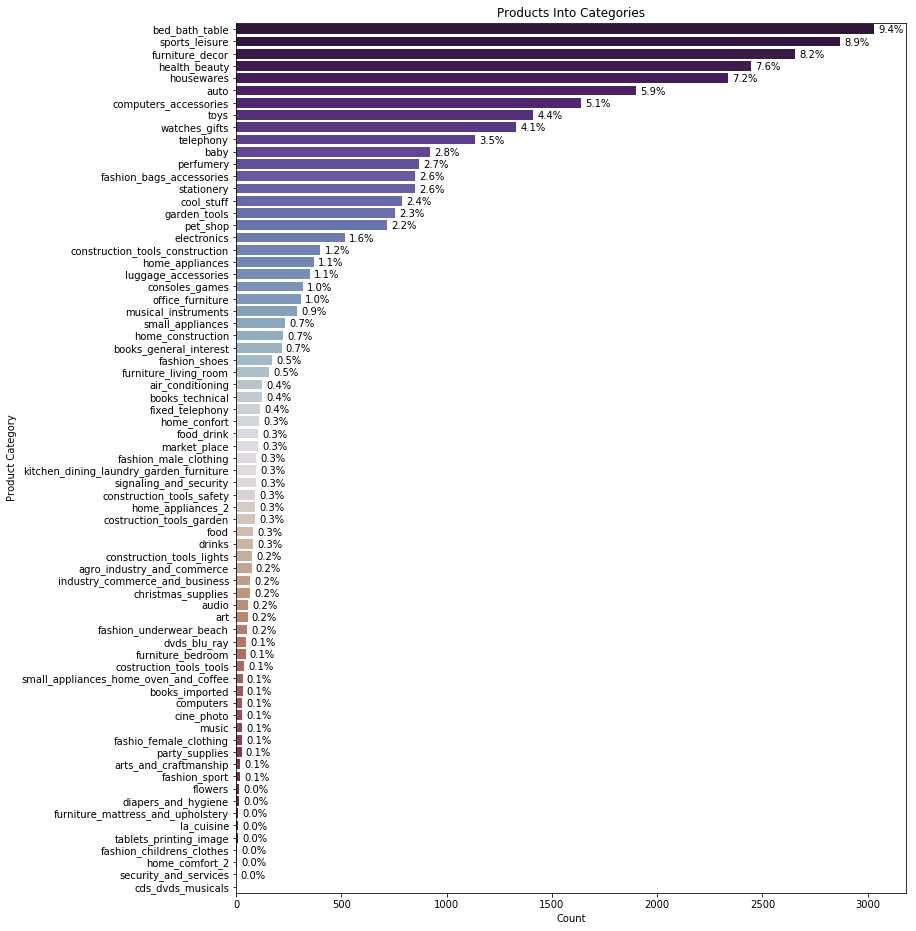

In [73]:
fig = plt.figure(figsize=(12, 16))
ax = sns.countplot(y=updated_product_df['product_category'], palette='twilight_shifted',
                   order = updated_product_df['product_category'].value_counts().index)
total = len(updated_product_df['product_category'])
for p in ax.patches:
    x = (p.get_width() + 80)
    y = (p.get_y() + p.get_height()/2) + 0.9
    ax.annotate('{:.1f}%'.format(100 * p.get_width()/total), (x,y),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Products Into Categories')
plt.ylabel('Product Category')
plt.xlabel('Count')

plt.savefig('Products')

## 3. Ecommerce by Region, State and City

Text(0, 0.5, 'Count')

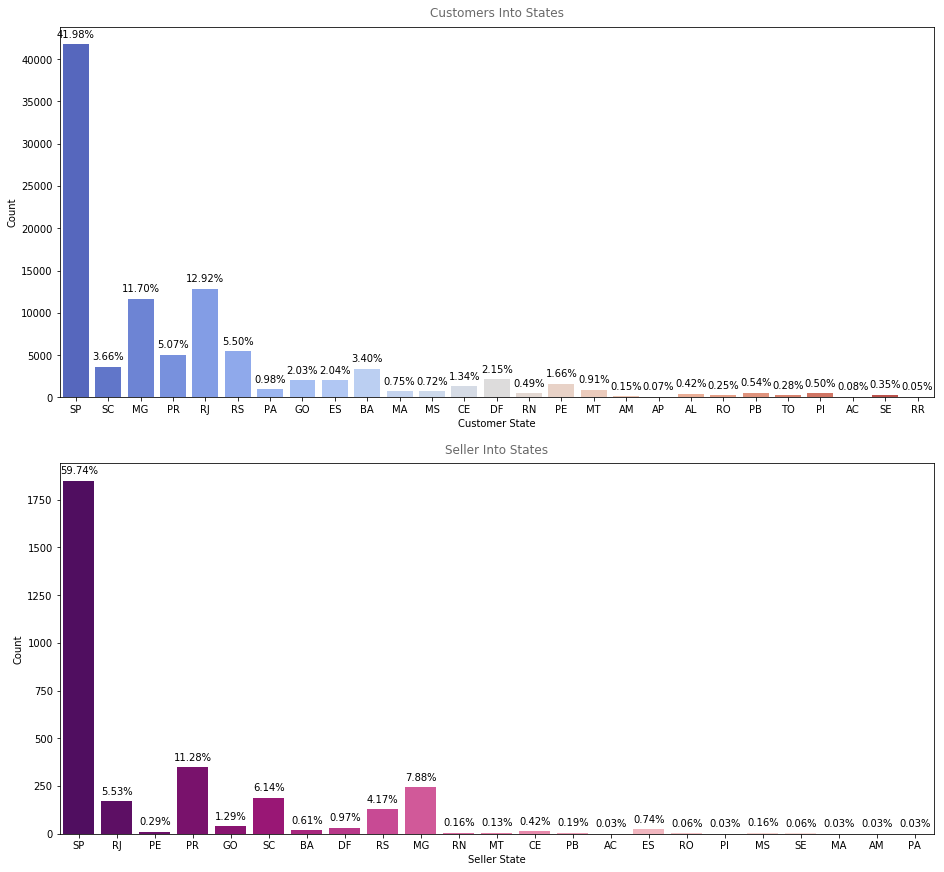

In [74]:
fig = plt.figure(constrained_layout=True, figsize=(13, 12))

# Axis definition
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, :])

sns.countplot(x=olist_customer['customer_state'], ax=ax1, palette='coolwarm')
total = len(olist_customer['customer_state'])
for p in ax1.patches:
    ax1.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax1.set_title('Customers Into States', size=12, color='dimgrey', pad=10)
ax1.set_xlabel('Customer State')
ax1.set_ylabel('Count')

sns.countplot(x=olist_sellers['seller_state'], ax=ax2, palette='RdPu_r')
total = len(olist_sellers['seller_state'])
for p in ax2.patches:
    ax2.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax2.set_title('Seller Into States', size=12, color='dimgrey', pad=10)
ax2.set_xlabel('Seller State')
ax2.set_ylabel('Count')

## 4. Payment Type Analysis

One of the datasets provided have informations about order's payment. To see how payments can take influence on e-commerce, we can build a mini-dashboard with main concepts: payments type and payments installments. The idea is to present enough information to clarify how e-commerce buyers usually prefer to pay orders.

In [75]:
olist_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


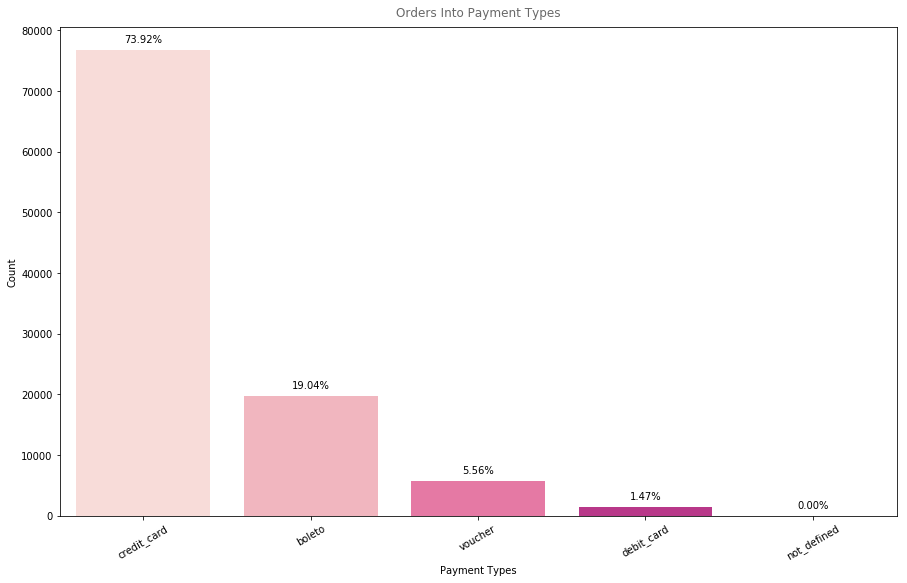

In [76]:
fig = plt.figure(figsize=(15, 9))
ax = sns.countplot(x=olist_order_payments['payment_type'], palette='RdPu')
total = len(olist_order_payments['payment_type'])
for tick in ax.get_xticklabels():
    tick.set_rotation(30)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Orders Into Payment Types', size=12, color='dimgrey', pad=10)
plt.ylabel('Count')
plt.xlabel('Payment Types')

plt.savefig('Products')


A large number of online buyers use credit card as their prefered mode of payment followed by boleto.
According to wiki ,boleto is a a payment method in Brazil regulated by FEBRABAN, short for Brazilian Federation of Banks.A boleto can be paid at ATMs, branch facilities and internet banking of any Bank, Post Office, Lottery Agent and some supermarkets until its due date. After the due date it can only be paid at the issuer bank facilities.

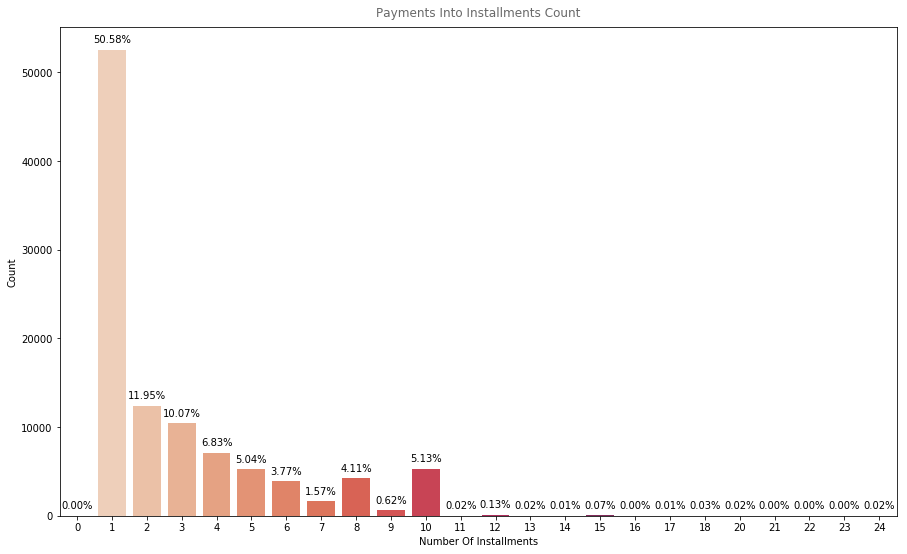

In [77]:
fig = plt.figure(figsize=(15, 9))
ax = sns.countplot(x=olist_order_payments['payment_installments'], palette='rocket_r')
total = len(olist_order_payments['payment_installments'])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100 * p.get_height()/total), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.title('Payments Into Installments Count', size=12, color='dimgrey', pad=10)
plt.ylabel('Count')
plt.xlabel('Number Of Installments')

plt.savefig('Products')

In [78]:
print("Average value of transaction on credit card : BRL {:,.0f}".format(np.mean(olist_order_payments[olist_order_payments.payment_type=='credit_card']['payment_value'])))
print("Average value of transaction on boleto : BRL {:,.0f}".format(np.mean(olist_order_payments[olist_order_payments.payment_type=='boleto']['payment_value'])))
print("Average value of transaction on voucher: BRL {:,.0f}".format(np.mean(olist_order_payments[olist_order_payments.payment_type=='voucher']['payment_value'])))
print("Average value of transaction on debit card: BRL {:,.0f}".format(np.mean(olist_order_payments[olist_order_payments.payment_type=='debit_card']['payment_value'])))

Average value of transaction on credit card : BRL 163
Average value of transaction on boleto : BRL 145
Average value of transaction on voucher: BRL 66
Average value of transaction on debit card: BRL 143


For each of the transaction types , the value at the quantiles is printed out for better interpretation . Distribution and box plot is also tried out for visualisation purpose.

In [79]:
print("Credit Card quantiles")
print(olist_order_payments[olist_order_payments.payment_type=='credit_card']['payment_value'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Boleto quantiles")
print(olist_order_payments[olist_order_payments.payment_type=='boleto']['payment_value'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Voucher quantiles")
print(olist_order_payments[olist_order_payments.payment_type=='voucher']['payment_value'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Debit Card quantiles")
print(olist_order_payments[olist_order_payments.payment_type=='debit_card']['payment_value'].quantile([.01,.25,.5,.75,.99]))

Credit Card quantiles
0.01      13.4100
0.25      62.2100
0.50     106.8700
0.75     181.2100
0.99    1097.3334
Name: payment_value, dtype: float64

Boleto quantiles
0.01     21.7500
0.25     55.5225
0.50     93.8900
0.75    160.7625
0.99    946.9896
Name: payment_value, dtype: float64

Voucher quantiles
0.01      0.7170
0.25     18.0350
0.50     39.2800
0.75     80.0000
0.99    454.5824
Name: payment_value, dtype: float64

Debit Card quantiles
0.01     20.7412
0.25     51.1000
0.50     89.3000
0.75    154.3200
0.99    941.1528
Name: payment_value, dtype: float64


For transaction of higher value , people have used credit mode of payment followed by bolero and then debit card . The preference of using vouchers for transaction is on the lower side .Lets check the distribution of the transactions.

[Text(0, 0, 'credit_card'),
 Text(0, 0, 'boleto'),
 Text(0, 0, 'voucher'),
 Text(0, 0, 'debit_card'),
 Text(0, 0, 'not_defined')]

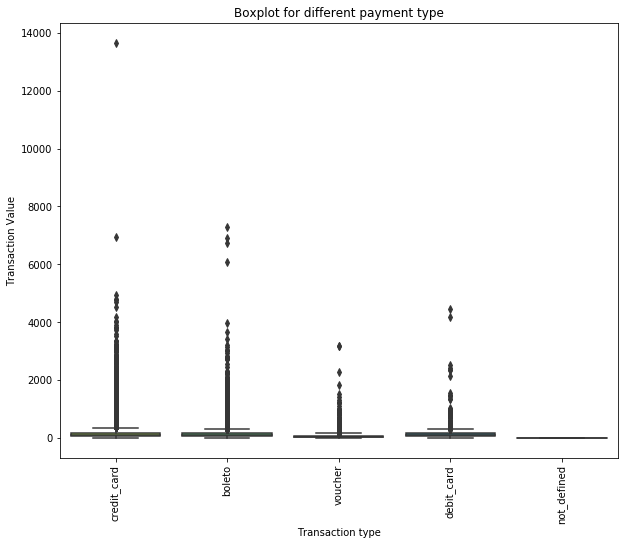

In [80]:
plt.figure(figsize=(10,8))
ax=sns.boxplot(x=olist_order_payments.payment_type,y=olist_order_payments.payment_value,palette=sns.color_palette(palette="viridis_r"))
ax.set_title("Boxplot for different payment type")
ax.set_xlabel("Transaction type")
ax.set_ylabel("Transaction Value")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Looking at the above box plot we can understand the following:

We can see that there are extreme outliers in this case. This means that for higher value of transactions ,people prefer to buy on credit and pay later. Debit card and vouchers are not used much and there are two modes dominating the distribution plot .

Summary :
The following are some of the key points noted from the Olist E commerce analysis.

1. Maximum order amount is BRL 13440 and Minumum order amount is BRL 2.
2. Bed Bath table,health beauty,sports are some categories that are bought most often by the customers.
3. The frequency of the orders has been higher on Mon,Tue whereas the frequency of orders is low during Saturday and sundays.
4.  While during weekdays , the order frequency increases steadly after 9 AM , the order frequency picks up only after 15:00 hrs during sundays
5. Credit card,boleto have been used for transactions of high value whereas people prefer using vouchers for low transaction values.